# Tarea 1

In [26]:
import sympy
import numpy as np
import matplotlib.pyplot as plt

## Problema 1

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.

**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.

**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [6]:
edad = np.loadtxt('data/edad.dat')
altura = np.loadtxt('data/altura.dat')

## Problema 3

**(a)**  Usando los datos de `chirps.txt`

In [3]:
%cat data/chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?


**NOTA**: Datos obtenidos de [aquí](http://mathbits.com/MathBits/TISection/Statistics2/linearREAL.htm)


In [4]:
class RegresionLineal:
    def __init__(self, alpha=0.03, max_iters=10000, tols=0.00001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = x.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m

In [13]:
CT=np.loadtxt('data/chirps.txt')
C=CT.transpose()[0]
T=CT.transpose()[1]

In [19]:
r = RegresionLineal(alpha=0.003, max_iters=1000000, tols=0.0000001)
r.gradientDescent(C, T)

La función convergió con beta: [22.26350136  3.44531603] en la iteración 123659


In [32]:
def plotModelo(x,y,rl,iteracion):
    modelo = lambda x,b,m: b + m*x # función para graficar el modelo
    
    _beta = rl.historia['beta'][iteracion]


    scatter(x,y, label="datos")
    plot(x, modelo(x, _beta[0], _beta[1]), label="int: %1.2f, pen: %1.2f" % (_beta[0], _beta[1]))
    xlabel('Edad (yr)')
    ylabel('Altura (m)')
    legend(loc="best")
    #ax[0].set_xlim(0, max(x))
    #ax[0].set_ylim(0, max(y))

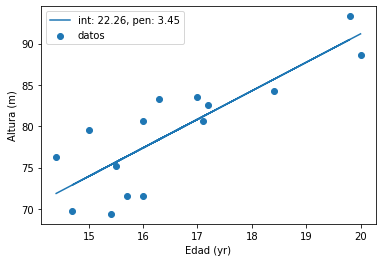

In [33]:
plotModelo(C,T,r,123658)

## Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?

## Problema 5

Use el archivo `radioactive_decay.dat`

In [5]:
%cat dat a/radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

In [38]:
datos=np.loadtxt('data/radioactive_decay.txt')
time=datos.transpose()[0]
remaining=datos.transpose()[1]

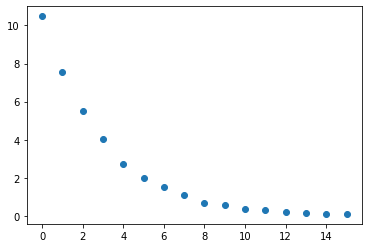

In [39]:
scatter(time,remaining)

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

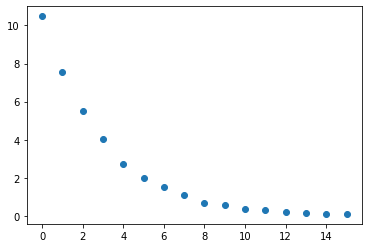

In [43]:
scatter(time,remaining)

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.